# [ATM 623: Climate Modeling](../index.ipynb)

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 13: Orbital variations, insolation, and the ice ages

### About these notes:

This document uses the interactive [`Jupyter notebook`](https://jupyter.org) format. The notes can be accessed in several different ways:

- The interactive notebooks are hosted on `github` at https://github.com/brian-rose/ClimateModeling_courseware
- The latest versions can be viewed as static web pages [rendered on nbviewer](http://nbviewer.ipython.org/github/brian-rose/ClimateModeling_courseware/blob/master/index.ipynb)
- A complete snapshot of the notes as of May 2017 (end of spring semester) are [available on Brian's website](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2017/Notes/index.html).

[Also here is a legacy version from 2015](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/Notes/index.html).

Many of these notes make use of the `climlab` package, available at https://github.com/brian-rose/climlab

In [1]:
#  Ensure compatibility with Python 2 and 3
from __future__ import print_function, division

## Contents

1. [The ice ages](#section1)
2. [Introducing the astronomical theory of the ice ages](#section2)
3. [Ellipses and orbits](#section3)
4. [Past orbital variations](#section4)
5. [Using `climlab` to calculate insolation for arbitrary orbital parameters](#section5)
6. [Past changes in insolation: investigating the Milankovitch hypothesis](#section6)
7. [Understanding the effects of orbital variations on insolation](#section7)
8. [Summary](#section8)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from climlab import constants as const
from IPython.display import display, Image
#  Disable interactive plotting (use explicit display calls to show figures)
plt.ioff()

____________
<a id='section1'></a>

## 1. The ice ages
____________

Recent Earth history (past few million years) has been dominated by the repeated growth and retreat of large continental ice sheets, mostly over the land masses of the Northern Hemisphere.

### Extent of glaciation

The images below show typical maximum extents of the ice sheets during recent glaciations (grey) compared with present-day ice sheets (black)

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Iceage_north-intergl_glac_hg.png/480px-Iceage_north-intergl_glac_hg.png'>

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Iceage_south-intergl_glac_hg.png/480px-Iceage_south-intergl_glac_hg.png'>

> Hannes Grobe/AWI, http://commons.wikimedia.org/wiki/File:Iceage_north-intergl_glac_hg.png

<a id='icevolumeseries'></a>
### Pacing of ice ages: evidence from ocean sediments

The figure below shows a global record of **oxygen isotopes** recorded in the shells of marine organisms. This record tells us primarily about variations in **global ice volume** -- because the net evaporation of water from the oceans to build up the ice sheets leaves the oceans enriched in heavier isotopes.

The x axis is plotted in **Thousands of years before present** (present-day is at zero on the left).



<img src='../images/Lisiecki_Raymo_Fig.4top.png' width=800>

> Lisiecki, L. E. and Raymo, M. E. (2005). A Pliocene-Pleistocene stack of 57 globally distributed benthic δ18O records. Paleoceanog., 20.

The ice ages (times of extensive glaciation and high ocean $\delta^{18}$O) do not seem to be random fluctations. They have come and gone (approximately) periodically, somewhat like the seasons.

**Spectral analysis** of such records reveals peaks at some special frequencies:

<img src='../images/ImbrieImbrie_Fig42.png' width=400>

> Imbrie, J. and Imbrie, K. P. (1986). Ice Ages: Solving the Mystery. Harvard University Press, Cambridge, Massachusetts.

The peaks noted on this figure are special because they correspond to frequencies of variations in Earth's orbital parameters, as we will see.

These kind of results became available in the 1970’s for the first time, because ocean sediment cores allowed a sufficiently detailed look into the past to use time series analysis methods on them, e.g. to compute spectra.

The presence of peaks in the spectrum at orbital frequencies was seen as convincing evidence that the so-called **astronomical theory of the ice ages** was (at least partially) correct.


____________
<a id='section2'></a>

## 2. Introducing the astronomical theory of the ice ages
____________

The **Astronomical Theory** of climate and the ice ages looks to the **regular, predictable variations in the Earth's orbit around the Sun** as the driving force for the growth and melt of the great ice sheets. Such theories have been discussed since long before there was any evidence about the timing of past glaciations.

Last time we saw that insolation is NOT perfectly symmetrically distributed between the two hemispheres and seasons. 

To refresh our memory, let's use 
```
climlab.solar.insolation.daily_insolation()
```
to compare the maximum insolation received at the North Pole (at its summer solstice) and the South Pole (at its summer solstice).

In [8]:
from climlab.solar.insolation import daily_insolation
days = np.linspace(0, const.days_per_year, 365. )
Qnorth = daily_insolation(90,days)
Qsouth = daily_insolation(-90,days)
print( 'Daily average insolation at summer solstice:')
print( 'North Pole: %0.2f W/m2.' %np.max(Qnorth))
print( 'South Pole: %0.2f W/m2.' %np.max(Qsouth))

Daily average insolation at summer solstice:
North Pole: 525.31 W/m2.
South Pole: 562.03 W/m2.


/Users/br546577/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


These asymmetries arise because of the detailed shape of the orbit of the Earth around the Sun and the tilt of the Earth's axis of rotation.

As these orbitals details change over time, there are significant changes in the distribution of sunlight over the seasons and latitudes.

### The Milankovitch hypothesis

Version of the astronomical theory have been debated for at least 150 years.

The most popular flavor has been the so-called **Milankovitch hypothesis**:

> Ice sheets grow during periods of *weak summer insolation* in the Northern high latitudes.

The idea is that for an ice sheet to grow, seasonal snow must survive through the summer. Milankovitch therefore focussed on the factors determining the climatic conditions during **summer**.

____________
<a id='section3'></a>

## 3. Ellipses and orbits
____________

First, watch this neat animation from [Peter Huybers](http://www.people.fas.harvard.edu/~phuybers) (Harvard University):

http://www.people.fas.harvard.edu/~phuybers/Inso/Orbit.mv4

Watch carefully and note the three ways that the orbit is varying simultaneously.

From Professor Huybers' web page:
>A movie depicting Earth's changing orbit over the last 100Ky. The orientation is such that spring equinox (indicated by a vertical bar) is directly to the front with the sun behind it. Northern Hemisphere summer is to our right, and Northern Hemisphere winter is to the left. The apsidal (dashed) line connects perihelion (Earth's closest approach to the sun) to aphelion (the point when Earth is furthest from the sun). The rotaion of the apsidal line occurs because of the precession of the equinoxes and has a roughly twenty-two thousand year period. The semi-circle around the Earth indicates the location of the equator and the straight line is the polar axis. Obliquity is defined as the angle beetween the orbital and equatorial planes. The variations in Earth's obliquity and the eccentricity of Earth's orbit have both been increased in magnitude by a factor of ten. Also, the Earth's angular velocity has been decreased by a factor of five thousand. Note that Earth's angular velocity is slowest at aphelion and fastest at perihelion. 



The Earth’s orbit around the Sun traces out an **ellipse**, with the Sun at one focal point.

<img src='../images/ImbrieImbrie_Fig14.png' width=600>

> Imbrie, J. and Imbrie, K. P. (1986). Ice Ages: Solving the Mystery. Harvard University Press, Cambridge, Massachusetts.

### How to draw an ellipse

1. Take any two points on a plane
2. Attach the two ends of a piece of string to the two points. 
3. Pull the loose string out as far as it will go in any direction, and place a pencil mark at that point.
4. Do the same for every possible direction.
5. Congratulations, you have just drawn a perfect ellipse. The two points are called **foci** or focal points.

Keep this in mind, and you will always understand the **mathematical definition of an ellipse**:

> An ellipse is a curve that is the locus of all points in the plane the sum of whose distances from two fixed points (the foci) is a positive constant.

In our case, the positive constant is the total length of the string.

### Perihelion and Aphelion

The point in the orbit that is **closest to the sun** is called **Perihelion**.
The farthest point is called **Aphelion**.

Distances (present-day): 

- Perihelion,  $ d_p = 1.47 \times 10^{11}$ m
- Aphelion,  $ d_a = 1.52 \times 10^{11}$ m

### Eccentricity

The eccentricity of the orbit is defined as
$$ e = \frac{d_a-d_p}{d_a+d_p} $$

So for present-day values, $e = 0.017 = 1.7\%$

Earth’s orbit is nearly circular, but not quite!  

(What value of $e$ would a purely circular orbit have?)

As the Earth travels around its orbit, the **distance to the sun varies**. The energy flux (W m$^{-2}$) is larger when the Earth is closer to the sun (i.e. near perihelion).

At present, perihelion occurs on January 3. This is very close to the Northern Hemisphere winter solstice (Dec. 21).

**The Earth actually receives MORE total sunlight during Northern Winter than during Northern Summer.**

It is thus critical to understand the relative timing of our seasons (which are determined by the axial tilt or obliquity) and the perehelion.

### Obliquity

The obliquity $\Phi$ is the **tilt of the Earth’s axis of rotation with respect to a line normal to the plane of the Earth’s orbit around the Sun.**  

Currently $\Phi = 23.5^\circ$

Obliquity is the fundamental reason we have seasons, and would have seasons even with a perfectly circular orbit ($e=0$)

Higher obliquity means:

- more summertime insolation at the poles
- less wintertime insolation in mid-latitudes

### Longitude of perihelion and precession of the equinoxes

The **longitude of perihelion** is defined as the angle $\Lambda$ between the Earth-Sun line at vernal equinox and the line from the Sun to perihelion (see sketch).

The current value is $\Lambda = 281^\circ$ (perihelion on January 3, shortly after NH winter solstice).

We call the gradual change over time of the longitude of perihelion the **precession of the equinoxes** (or just precession).  It is the **gradual change in the time of year at which the Earth is closest to the Sun**.

#### Question

Can there be any precession for a planet with a *perfectly circular* orbit (zero eccentricity)?

It is important to understand that eccentricity modulates the precession. *Highly eccentric orbits lead to larger differences in the seasonal distribution of insolation.* 

We quantify this with the **precessional parameter**

$$ e \sin \Lambda $$

Large positive precessional parameter = Excess insolation during summer in the northern hemisphere.

### The three orbital parameters

We have just identified three parameters that control the seasonal and latitudinal distribution of insolation: $e, \Lambda, \Phi$

All three vary in predictable ways over time. They have been calculated very accurately from astronomical considerations (basically the gravity of the Earth, Sun, moon, and other solar system objects).


____________
<a id='section4'></a>

## 4. Past orbital variations
____________


There are tools in `climlab` to look up orbital parameters for Earth over the last 5 million years.

We will use the package
```
climlab.solar.orbital
```

In [10]:
from climlab.solar.orbital import OrbitalTable

Make reference plots of the variation in the three orbital parameter over the last 1 million years

In [11]:
kyears = np.arange( -1000., 1.)
table = OrbitalTable()
orb = table.lookup_parameters( kyears )

Loading Berger and Loutre (1991) orbital parameter data from file /Users/br546577/anaconda3/lib/python3.6/site-packages/climlab/solar/orbit91


The object called 
```
orb
```
is a Python dictionary which now holds 1 million years worth of orbital data, total of 1001 data points for each element: 

- eccentricity `ecc`
- obliquity angle `obliquity`
- solar longitude of perihelion `long_peri`

In [12]:
print( orb)
print( np.shape( orb['ecc'] ), np.shape( orb['long_peri'] ), np.shape( orb['obliquity'] ))

{'ecc': array([ 0.035765,  0.036953,  0.038114, ...,  0.018024,  0.017644,
        0.017236]), 'long_peri': array([ 122.46,  138.29,  154.17, ...,  247.23,  264.26,  281.37]), 'obliquity': array([ 23.778,  23.835,  23.877, ...,  23.697,  23.573,  23.446])}
(1001,) (1001,) (1001,)


In [13]:
fig = plt.figure( figsize = (8,8) )
ax1 = fig.add_subplot(3,1,1)
ax1.plot( kyears, orb['ecc'] )
ax1.set_title('Eccentricity $e$', fontsize=18 )
ax2 = fig.add_subplot(3,1,3)
ax2.plot( kyears, orb['ecc'] * np.sin( np.deg2rad( orb['long_peri'] ) ) )
ax2.set_title('Precessional parameter $e \sin(\Lambda)$', fontsize=18 )
ax2.set_xlabel( 'Thousands of years before present', fontsize=14 )
ax3 = fig.add_subplot(3,1,2)
ax3.plot( kyears, orb['obliquity'] )
ax3.set_title('Obliquity (axial tilt) $\Phi$', fontsize=18 )

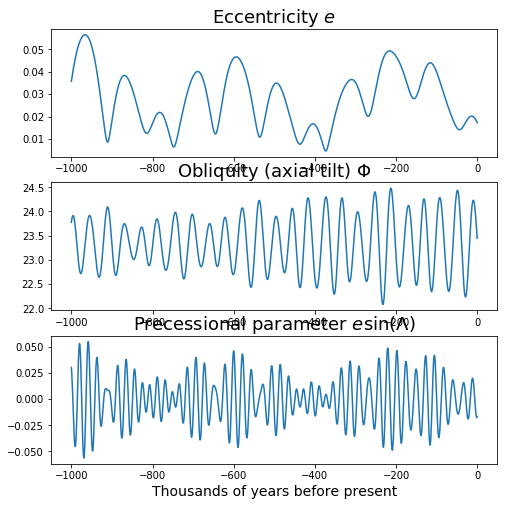

In [14]:
fig

### Timescales of orbital variation:

- Eccentricity varies slowly between nearly circular and slightly eccentric, with dominant periodicities of about 100 and 400 kyear. Current eccentricity is relatively small compared to previous few million years
- Longitude of perihelion has a period around 20 kyears, but effect is modulated by slow eccentricity variations. Precessional cycles are predicted to be small for the coming 50 kyears because of weak eccentricity.
- Obliquity varies between about 22.5º and 24.5º over a period of 40 kyears. It is currently near the middle of its range.


____________
<a id='section5'></a>

## 5. Using `climlab` to calculate insolation for arbitrary orbital parameters
____________



We can use the function 
```
climlab.solar.insolation.daily_insolation()
```
to calculate insolation for any arbitrary orbital parameters.

We just need to pass a dictionary of orbital parameters. The format of this dictionary should be the same as was produced above by 
```
OrbitalTable.lookup_parameters()
```

### An example: zero obliquity

Calculate the insolation at the **North Pole** for a planet with **zero obliquity** and **zero eccentricity**.

In [15]:
from climlab.solar.insolation import daily_insolation

In [16]:
thisorb = {'ecc':0., 'obliquity':0., 'long_peri':0.}

In [17]:
days = np.linspace(1.,20.)/20 * const.days_per_year
daily_insolation(90, days, thisorb)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Compare this with the same calculation for default (present-day) orbital parameters:

In [18]:
daily_insolation(90, days)

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   18.86214697,   85.00612352,  149.06416099,
        210.14318852,  267.43771123,  320.2345592 ,  367.91459762,
        409.95198005,  445.91155305,  475.44500661,  498.28632029,
        514.24699096,  523.21145124,  525.13300552,  520.03052731,
        507.9860795 ,  489.14354007,  463.70823983,  431.94754511,
        394.19224658,  350.83854561,  302.35036042,  249.26160895,
        192.17806354,  131.7783206 ,   68.81338909,    4.10438408,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ])

Do you understand what's going on here?

____________
<a id='section6'></a>

## 6. Past changes in insolation: investigating the Milankovitch hypothesis
____________



The **Last Glacial Maximum** or "LGM" occurred around 23,000 years before present, when the ice sheets were at their greatest extent. 

By 10,000 years ago, the ice sheets were mostly gone and the last ice age was over. 

If the **Milankovitch hypothesis** is correct, we should that **summer insolation in the high northern latitudes** increased substantially after the LGM.

The classical way to plot this is the look at **insolation at summer solstice at 65ºN**.  Let's plot this for the last 100,000 years.

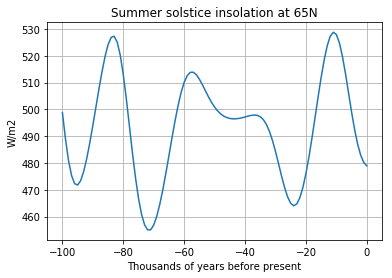

In [19]:
#  Plot summer solstice insolation at 65ºN
years = np.linspace(-100, 0, 101)  #  last 100 kyr
thisorb = table.lookup_parameters( years )
S65 = daily_insolation( 65, 172, thisorb )
fig, ax = plt.subplots()
ax.plot(years, S65)
ax.set_xlabel('Thousands of years before present')
ax.set_ylabel('W/m2')
ax.set_title('Summer solstice insolation at 65N')
ax.grid()
fig

Indeed, there was an increase of 60 W m$^{-2}$ over a 10 kyr interval following the LGM.

Why?

What orbital factors favor high insolation at 65ºN at summer solstice?

- high obliquity
- large, positive precessional parameter

Looking back at our plots of the orbital parameters, it turns out that both were optimal around 10,000 years ago.

Actually 10,000 years ago the climate was slightly warmer than today and the ice sheets had mostly disappeared already. 

The LGM occurred near a minimum in summer insolation in the north – mostly due to obliquity reaching a minimum, since we have been in a period of weak precession due to the nearly circular orbit. So this is consistent with the orbital theory.

The hypothesis is incomplete, but compelling.

### Comparing insolation at 10 kyr and 23 kyr

In [20]:
lat = np.linspace(-90, 90, 181)
days = np.linspace(1.,50.)/50 * const.days_per_year

orb_0 = table.lookup_parameters( 0 )  # present-day orbital parameters
orb_10 = table.lookup_parameters( -10 )  # orbital parameters for 10 kyrs before present
orb_23 = table.lookup_parameters( -23 )   # 23 kyrs before present
Q_0 = daily_insolation( lat, days, orb_0 )    
Q_10 = daily_insolation( lat, days, orb_10 )   # insolation arrays for each of the three sets of orbital parameters
Q_23 = daily_insolation( lat, days, orb_23 )

In [21]:
fig = plt.figure( figsize=(12,6) )


ax1 = fig.add_subplot(1,2,1)
Qdiff = Q_10 - Q_23
CS1 = ax1.contour( days, lat, Qdiff, levels = np.arange(-100., 100., 10.) )
ax1.clabel(CS1, CS1.levels, inline=True, fmt='%r', fontsize=10)
ax1.contour( days, lat, Qdiff, levels = [0], color = 'k' )
ax1.set_xlabel('Days since January 1', fontsize=16 )
ax1.set_ylabel('Latitude', fontsize=16 )
ax1.set_title('Insolation differences: 10 kyrs - 23 kyrs', fontsize=18 )

ax2 = fig.add_subplot(1,2,2)
ax2.plot( np.mean( Qdiff, axis=1 ), lat )
ax2.set_xlabel('W m$^{-2}$', fontsize=16 )
ax2.set_ylabel( 'Latitude', fontsize=16 )
ax2.set_title(' Annual mean differences', fontsize=18 )
ax2.set_ylim((-90,90))
ax2.grid()

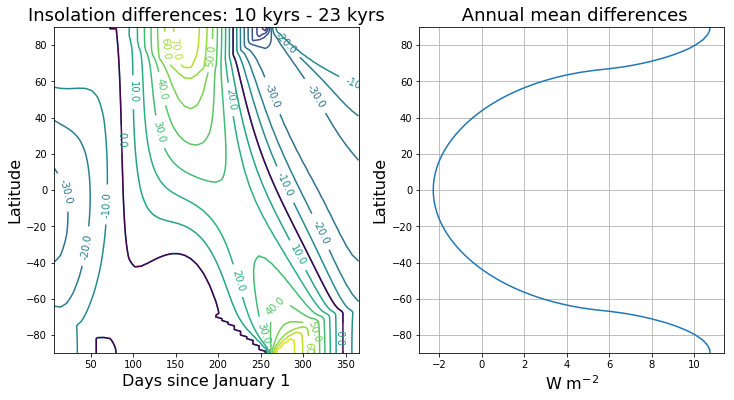

In [22]:
# repeat figure for display
fig

This figure shows that the **insolation at summer solstice** does not tell the whole story!

For example, the insolation in **late summer / early fall** apparently got weaker between 23 and 10 kyr (in the high northern latitudes).

The annual mean plot is perfectly symmetric about the equator.

This actually shows a classic obliquity signal: at 10 kyrs, the axis close to its maximum tilt, around 24.2º. At 23 kyrs, the tilt was much weaker, only about 22.7º. In the annual mean, a stronger tilt means more sunlight to the poles and less to the equator. This is very helpful if you are trying to melt an ice sheet.

Finally, take the **global average** of the difference:

In [23]:
print( np.average(np.mean(Qdiff,axis=1), weights=np.cos(np.deg2rad(lat))) )

0.00651043078327


The difference is tiny (and due to very small changes in the eccentricity). 

**Ice ages are driven by seasonal and latitudinal redistributions of solar energy**, NOT by changes in the total global amount of solar energy!


____________
<a id='section7'></a>

## 7. Understanding the effects of orbital variations on insolation
____________

We are going to create a figure showing past time variations in three quantities:

1. Global, annual mean insolation
2. Annual mean insolation at high northern latitudes
3. Summer solstice insolation at high northern latitudes

which we will compare to the orbital variations we plotted earlier.

Create a large array of insolation over the whole globe, whole year, and for every set of orbital parameters.

In [24]:
lat = np.linspace(-90, 90, 91)
num = 365.
days = np.linspace(1.,num,num)/num * const.days_per_year
Q = daily_insolation(lat, days, orb)
print( Q.shape)

/Users/br546577/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


(91, 365, 1001)


In [25]:
Qann = np.mean(Q, axis=1)  # time average over the year
print( Qann.shape)
Qglobal = np.empty_like( kyears )
for n in range( kyears.size ):   # global area-weighted average
    Qglobal[n] = np.average( Qann[:,n], weights=np.cos(np.deg2rad(lat)))
print( Qglobal.shape)

(91, 1001)
(1001,)


In [26]:
fig = plt.figure(figsize = (16,10))
ax = []
for n in range(6):
    ax.append(fig.add_subplot(3,2,n+1))

ax[0].plot( kyears, orb['ecc'] )
ax[0].set_title('Eccentricity $e$', fontsize=18 )
ax[2].plot( kyears, orb['obliquity'] )
ax[2].set_title('Obliquity (axial tilt) $\Phi$', fontsize=18 )
ax[4].plot( kyears, orb['ecc'] * np.sin( np.deg2rad( orb['long_peri'] ) ) )
ax[4].set_title('Precessional parameter $e \sin(\Lambda)$', fontsize=18 )

ax[1].plot( kyears, Qglobal )
ax[1].set_title('Global, annual mean insolation', fontsize=18 )
ax[1].ticklabel_format( useOffset=False )

ax[3].plot( kyears, Qann[80,:] )
ax[3].set_title('Annual mean insolation at 70N', fontsize=18 )

ax[5].plot( kyears, Q[80,170,:] )
ax[5].set_title('Summer solstice insolation at 70N', fontsize=18 )

for n in range(6):
    ax[n].grid()
for n in [4,5]:
    ax[n].set_xlabel( 'Thousands of years before present', fontsize=14 )

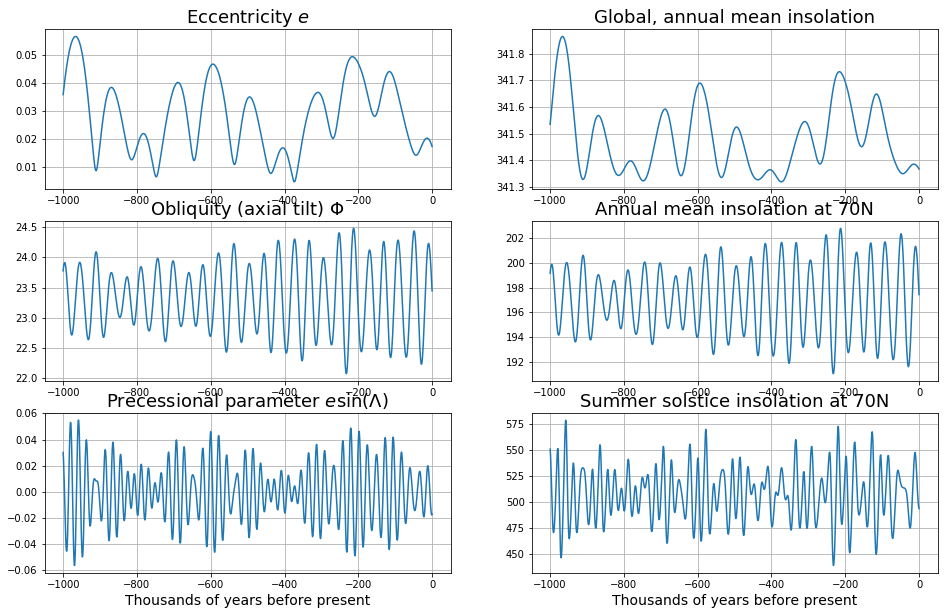

In [27]:
fig

We see that

1. **Global annual mean** insolation **varies only with eccentricity** (slow), and the variations are **very small**!
2. **Annual mean** insolation **varies with obliquity** (medium). Annual mean insolation does NOT depend on precession!
3. Summer solstice insolation at high northern latitudes is affected by both precession and obliquity. The variations are large.

____________
<a id='section8'></a>

## 8. Summary
____________

- The annual, global mean insolation varies only as a result of eccentricity $e$. The changes are very small (about 0.1 % through a typical eccentricity cycle from more circular to more elliptical)
- Obliquity controls the annual-mean equator-to-pole insolation gradient.
- The precessional parameter $e \sin⁡\Lambda$ controls the modulation in seasonal insolation due to eccentricity and longitude of perihelion $\Lambda$.

- The combined effects can result in 15% changes in high-latitude summer insolation
- Obliquity combined with eccentricity and longitude of perihelion control the amplitude of seasonal insolation variations at a point.
- Combined effects of the three orbital parameters can cause variations in seasonal insolation as large as 30% in high latitudes.

These geometrical considerations tell us that **seasonal variations in $Q$ can be rather large**, and will surely impact the climate. But to go from there to understanding how large ice sheets come and go is a difficult step, and requires climate models!

One thing is clear: any serious astronomical theory of climate needs to take account of the climate response to seasonal variations in Q, because these are much larger than the variations in annual mean insolation.


<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Version information
____________


In [28]:
%load_ext version_information
%version_information numpy, climlab

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.1.0
OS Darwin 16.7.0 x86_64 i386 64bit
numpy 1.13.1
climlab 0.6.0.dev10
Wed Oct 11 13:42:17 2017 EDT

____________

## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php)

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________